<a href="https://colab.research.google.com/github/Michaelha1808/traffic-signs-python/blob/main/trafficSigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content/drive/MyDrive/ML2'

In [ ]:
cd /content/drive/MyDrive/ML

/content/drive/MyDrive/ML


In [ ]:
pwd

'/content/drive/MyDrive/ML'

In [ ]:
ls

Michaelha.ipynb  test.p  traffic-signs-data.zip  train.p  valid.p


In [ ]:
cd ..

/content/drive/My Drive


In [ ]:
cd /content/drive/MyDrive/ML2

/content/drive/MyDrive/ML2


In [ ]:
ls


trafficSigns.ipynb


In [ ]:
link ="https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=c8a15af63ca99aa8bc41029fd093388f9bccf9a177add71d08e7c527ed7006b8
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget

In [ ]:
wget.download(link)

'traffic-signs-data.zip'

In [ ]:
data = "./"

In [ ]:
!unzip -q traffic-signs-data.zip -d $data

In [ ]:
train_link = data +"train.p"
valid_link = data + "valid.p"
test_link = data +"test.p"

In [ ]:
import pickle

In [ ]:
with open(train_link, mode="rb") as f:
  train = pickle.load(f)

In [ ]:
with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)

In [ ]:
with open(test_link, mode="rb") as f:
  test = pickle.load(f)

In [ ]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [ ]:
trainX = train["features"]
trainY = train["labels"]

In [ ]:
trainX.shape

(34799, 32, 32, 3)

In [ ]:
trainX[0].shape

(32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt


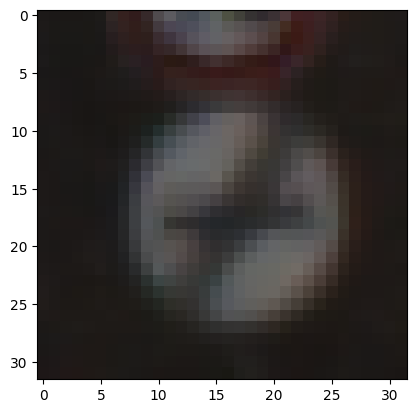

In [ ]:
plt.imshow(trainX[0])

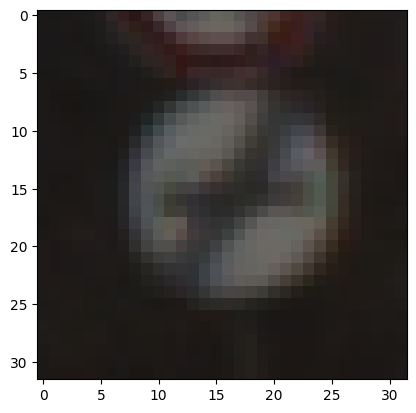

In [ ]:
plt.imshow(trainX[1])

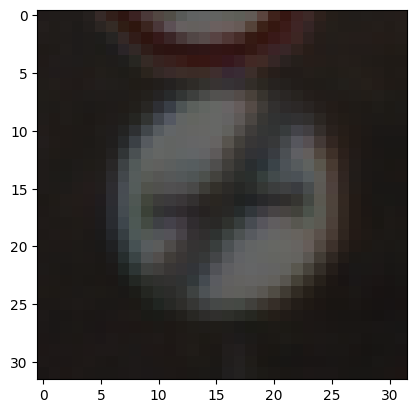

In [ ]:
plt.imshow(trainX[10])

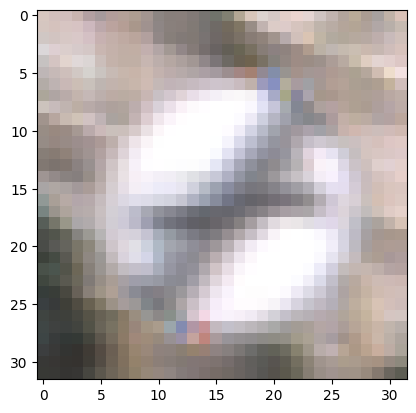

In [ ]:
plt.imshow(trainX[50])

In [ ]:
trainY[50]

41

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [ ]:
classNames[trainY[50]]

'End of no passing'

In [ ]:
from sklearn.utils import shuffle

In [ ]:
trainX, trainY = shuffle(trainX, trainY)

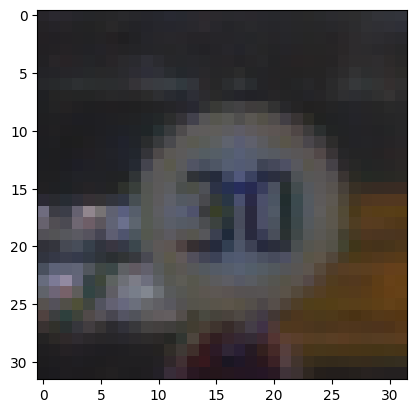

In [ ]:
plt.imshow(trainX[0])

In [ ]:
classNames[trainY[0]]

'Speed limit (30km/h)'

In [ ]:
validX = valid["features"]
validY = valid["labels"]

In [ ]:
testX = test["features"]
testY = test["labels"]

In [ ]:
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer()

In [ ]:
trainY = lb.fit_transform(trainY)

In [ ]:
validY = lb.fit_transform(validY)

In [ ]:
valid["labels"][0]

41

In [ ]:
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()

In [ ]:
width = 32
height =32
classes = 43

In [ ]:
shape = (width, height, 3)

In [ ]:
model.add(Conv2D(32,(3,3), padding = "same", input_shape = shape))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(32,(3,3), padding = "same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64,(3,3), padding = "same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64,(3,3), padding = "same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Dense(classes))

In [ ]:
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [ ]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [ ]:
learning_rate = 0.01

In [ ]:
epochs = 10
# epoch
# Steps
batch_size = 64

In [ ]:
opt = SGD(learning_rate=learning_rate, momentum = 0.9)

In [ ]:
model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
print("Start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs = epochs, verbose = 1)

Start training


<ipython-input-86-3ffd48ffc651>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs = epochs, verbose = 1)


Epoch 1/10
543/543 [==============================] - 349s 636ms/step - loss: 2.1674 - accuracy: 0.3795 - val_loss: 2.4149 - val_accuracy: 0.3249
Epoch 2/10
543/543 [==============================] - 360s 662ms/step - loss: 0.9392 - accuracy: 0.6925 - val_loss: 1.9264 - val_accuracy: 0.5215
Epoch 3/10
543/543 [==============================] - 352s 648ms/step - loss: 0.4701 - accuracy: 0.8438 - val_loss: 0.8816 - val_accuracy: 0.7488
Epoch 4/10
543/543 [==============================] - 337s 620ms/step - loss: 0.2782 - accuracy: 0.9094 - val_loss: 0.7379 - val_accuracy: 0.7896
Epoch 5/10
543/543 [==============================] - 344s 634ms/step - loss: 0.1940 - accuracy: 0.9367 - val_loss: 0.9233 - val_accuracy: 0.7515
Epoch 6/10
543/543 [==============================] - 333s 612ms/step - loss: 0.1410 - accuracy: 0.9549 - val_loss: 0.7794 - val_accuracy: 0.8084
Epoch 7/10
543/543 [==============================] - 339s 625ms/step - loss: 0.1070 - accuracy: 0.9659 - val_loss: 0.7205 -

In [ ]:
model.save("Michaelha.h5")

In [ ]:
saved_model = tf.keras.models.load_model("Michaelha.h5")

In [ ]:
result = saved_model.predict(testX[10:11])

NameError: ignored

In [ ]:
result

array([[3.44188306e-12, 1.35950509e-16, 1.75960323e-11, 6.09693096e-14,
        1.40659630e-12, 3.31979344e-13, 1.19778766e-13, 7.17712348e-13,
        1.81800755e-13, 1.63328429e-15, 8.46528739e-13, 3.46533224e-09,
        6.19500588e-12, 3.70469468e-15, 5.33180488e-13, 6.67705352e-17,
        9.84454705e-13, 1.27405994e-11, 2.21147531e-10, 5.21271781e-09,
        4.19768583e-07, 9.99988556e-01, 1.05923527e-10, 4.03046852e-06,
        2.37457665e-10, 1.09912097e-08, 1.04393344e-07, 2.16419039e-07,
        6.27828189e-09, 3.78152148e-10, 2.29684183e-08, 6.56168459e-06,
        9.47958210e-14, 2.32069138e-12, 2.39482723e-13, 2.60985547e-12,
        8.98438835e-14, 7.59699040e-11, 2.56092703e-10, 2.57198640e-09,
        4.32360051e-11, 9.99043513e-15, 9.75488001e-14]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
final = np.argmax(result)

In [ ]:
final = classNames[final]

In [ ]:
final

'Double curve'

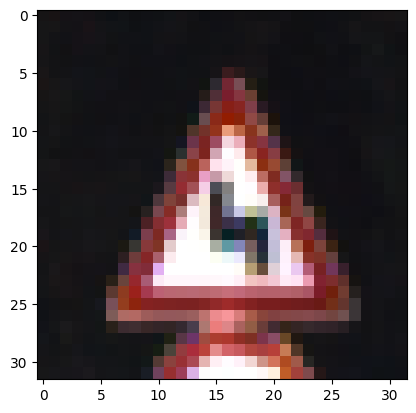

In [ ]:
plt.imshow(test["features"][80])